# Visualizing Geospatial Data
based on scipy2018-geospatial

## goals of the tutorial
- plot a map with matplotlib
- choropleth map (pysal - mapclassify)
- folium

**based on the open data of:**
- [ISTAT](https://www.istat.it/it/archivio/222527) Italian National Institute of Statistic 


### requirements
- python knowledge
- pandas

### status 
*"the map is not the territory"*

---

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import pysal as pi
import requests, zipfile, io
from shapely.geometry import Point
pd.options.display.max_rows = 10

/home/napo/dev/geospatial_bigdive/env/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


## data setup
based on the previous tutorial

In [2]:
libraries = gpd.read_file('data'  + os.sep + 'italian_libraries.shp')
italian_regions = gpd.read_file('data' + os.sep + 'Reg01012019_WGS84.shp')
italian_regions = italian_regions.to_crs('epsg:3857')
libraries = libraries.to_crs('epsg:3857')
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


# GeoPandas visualization functionality

**Basic plot**


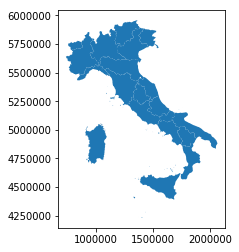

In [3]:
italian_regions.plot()

**Coloring based on column values** 

In [4]:
italian_regions.columns

Index(['COD_RIP', 'COD_REG', 'DEN_REG', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

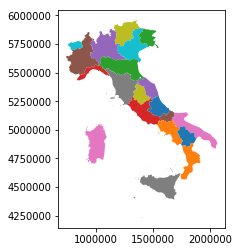

In [5]:
italian_regions.plot(column='DEN_REG')

**Adjusting the figure size**


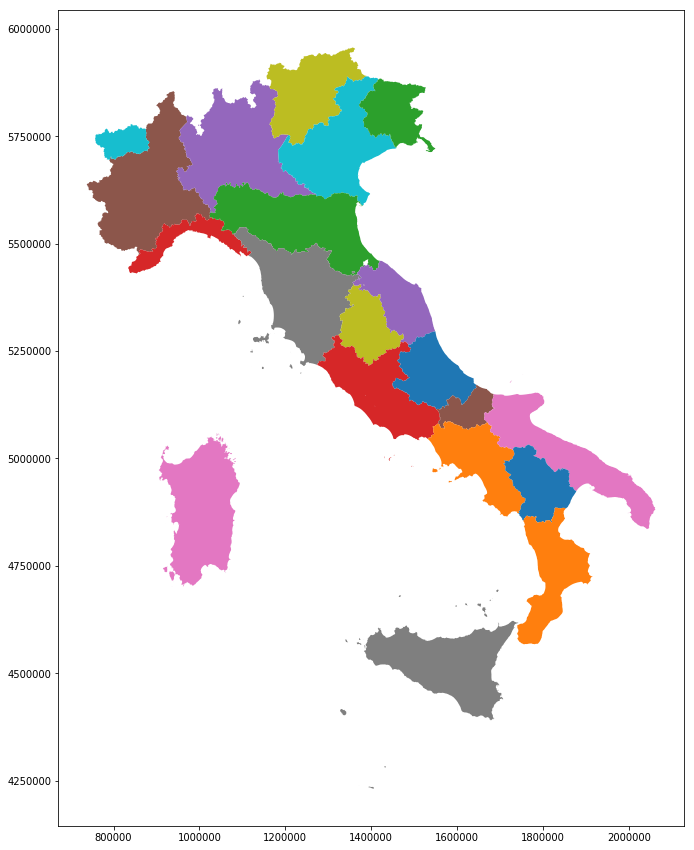

In [6]:
italian_regions.plot(column='DEN_REG',figsize=(15, 15))

**Adding a legend**

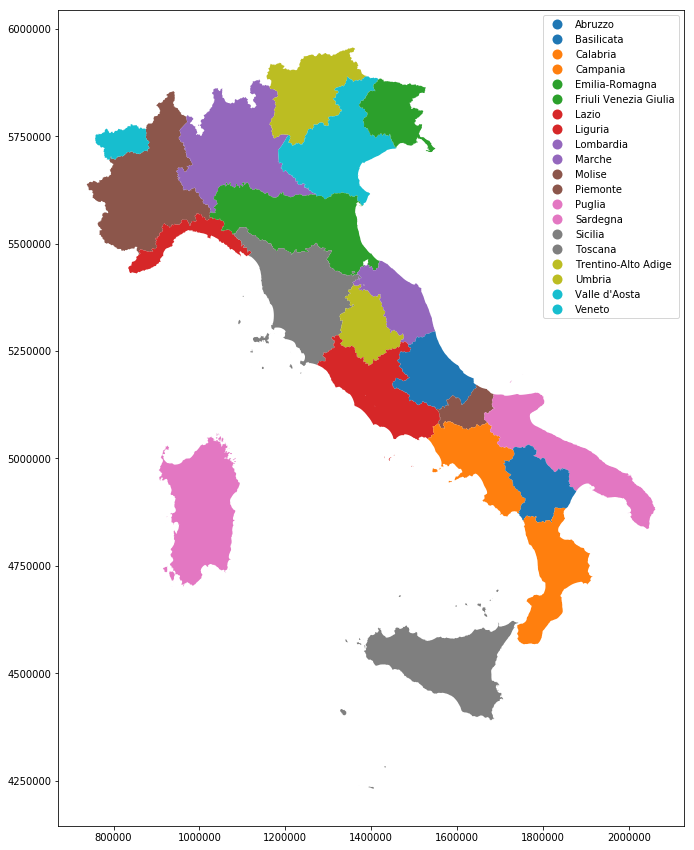

In [7]:
italian_regions.plot(column='DEN_REG',legend=True,figsize=(15, 15))

**Removing the box / x and y coordinate label**

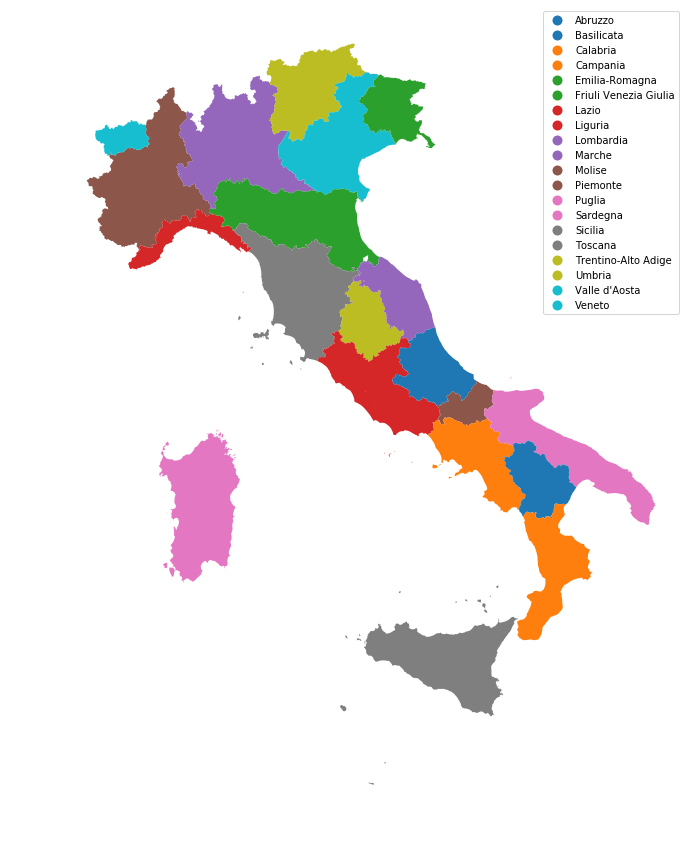

In [8]:
ax = italian_regions.plot(column='DEN_REG',legend=True,figsize=(15, 15))
ax.set_axis_off()

**Change of the color scale**

the color scale can be chosen to make those offered by [maptplotlib](https://matplotlib.org/users/colormaps.html)

DEN_REG is a categorical variable that must highlight each region well without creating confusion, therefore it is suggested to [choose](https://matplotlib.org/users/colormaps.html#list-colormaps) a color scale from among those described as *divergent*

![](https://camo.githubusercontent.com/314c4f9be13d1fef2a6c30a03ee9135ac0e311d9/68747470733a2f2f6d6174706c6f746c69622e6f72672f5f696d616765732f677261797363616c655f30315f30332e706e67)

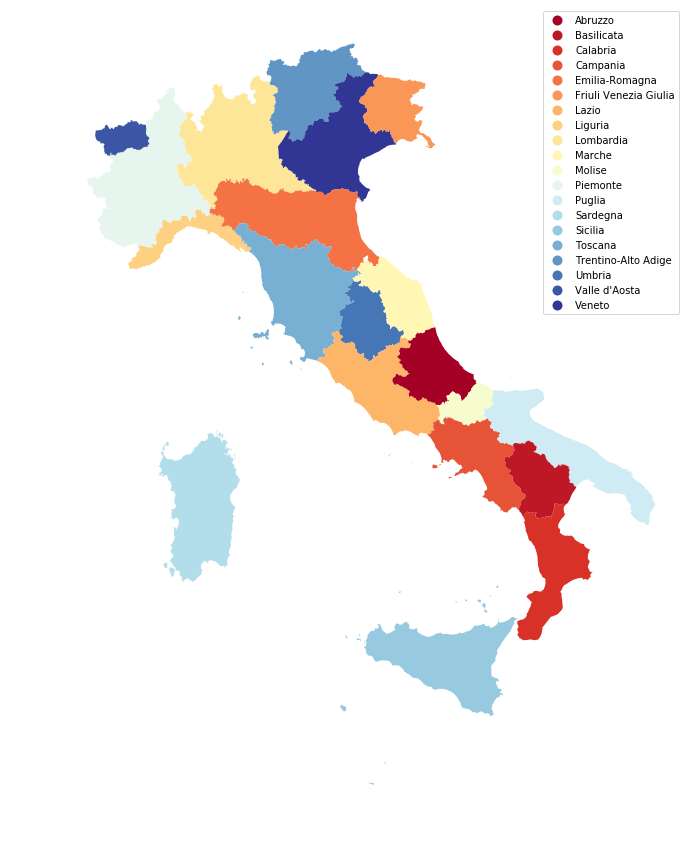

In [9]:
ax = italian_regions.plot(column='DEN_REG',legend=True,figsize=(15, 15),cmap="RdYlBu")
ax.set_axis_off()

**highlight the edges**

Borders can be highlighted using the linewidth and edegecolor parameters

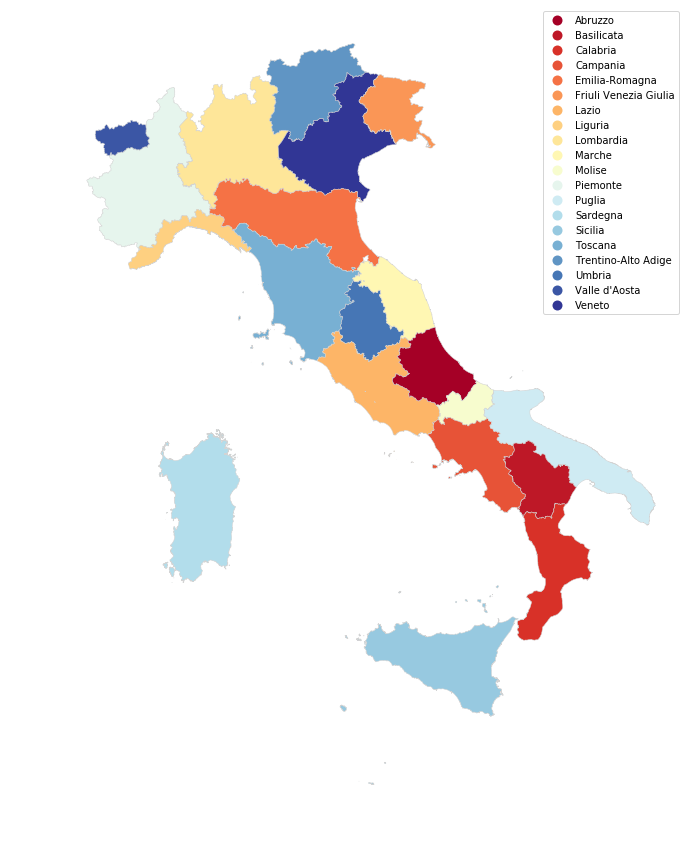

In [10]:
ax = italian_regions.plot(column='DEN_REG',legend=True,figsize=(15, 15),cmap="RdYlBu", edgecolor = "lightgrey", linewidth = 0.5)
ax.set_axis_off()


**add labels to the map**

In [11]:
italian_regions.representative_point()

0      POINT (870867.5601905969 5664917.60474865)
1     POINT (820619.8124435988 5736864.147265466)
2     POINT (1077904.065492155 5726969.108332533)
3     POINT (1249127.895666767 5842585.083537841)
4     POINT (1346267.707443719 5739357.178227715)
                         ...                     
15    POINT (1871900.032444465 4994490.301153687)
16    POINT (1795446.427193109 4941868.031084491)
17    POINT (1851194.566902962 4727206.085883014)
18    POINT (1573754.106430499 4505855.265662744)
19    POINT (1013600.517729901 4876439.058439249)
Length: 20, dtype: object

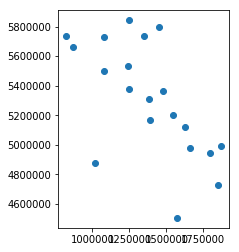

In [12]:
italian_regions.representative_point().plot()

In [13]:
representative_points = gpd.GeoDataFrame(italian_regions.representative_point()).reset_index()

In [14]:
representative_points

,index,0
0,0,POINT (870867.5601905969 5664917.60474865)
1,1,POINT (820619.8124435988 5736864.147265466)
2,2,POINT (1077904.065492155 5726969.108332533)
3,3,POINT (1249127.895666767 5842585.083537841)
4,4,POINT (1346267.707443719 5739357.178227715)
...,...,...
15,15,POINT (1871900.032444465 4994490.301153687)
16,16,POINT (1795446.427193109 4941868.031084491)
17,17,POINT (1851194.566902962 4727206.085883014)
18,18,POINT (1573754.106430499 4505855.265662744)


In [15]:
representative_points = representative_points.rename(columns={0:'geometry'}).set_geometry('geometry')

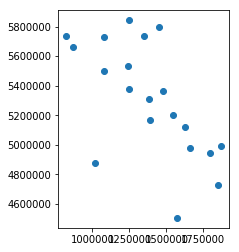

In [16]:
representative_points.plot()

In [17]:
labels = italian_regions.DEN_REG.to_frame().reset_index()

In [18]:
representative_points = representative_points.merge(labels,on="index")

In [19]:
representative_points = representative_points.rename(columns={'DEN_REG':'names'})

In [20]:
representative_points

,index,geometry,names
0,0,POINT (870867.5601905969 5664917.60474865),Piemonte
1,1,POINT (820619.8124435988 5736864.147265466),Valle d'Aosta
2,2,POINT (1077904.065492155 5726969.108332533),Lombardia
3,3,POINT (1249127.895666767 5842585.083537841),Trentino-Alto Adige
4,4,POINT (1346267.707443719 5739357.178227715),Veneto
...,...,...,...
15,15,POINT (1871900.032444465 4994490.301153687),Puglia
16,16,POINT (1795446.427193109 4941868.031084491),Basilicata
17,17,POINT (1851194.566902962 4727206.085883014),Calabria
18,18,POINT (1573754.106430499 4505855.265662744),Sicilia


In [21]:
import matplotlib.pyplot as plt

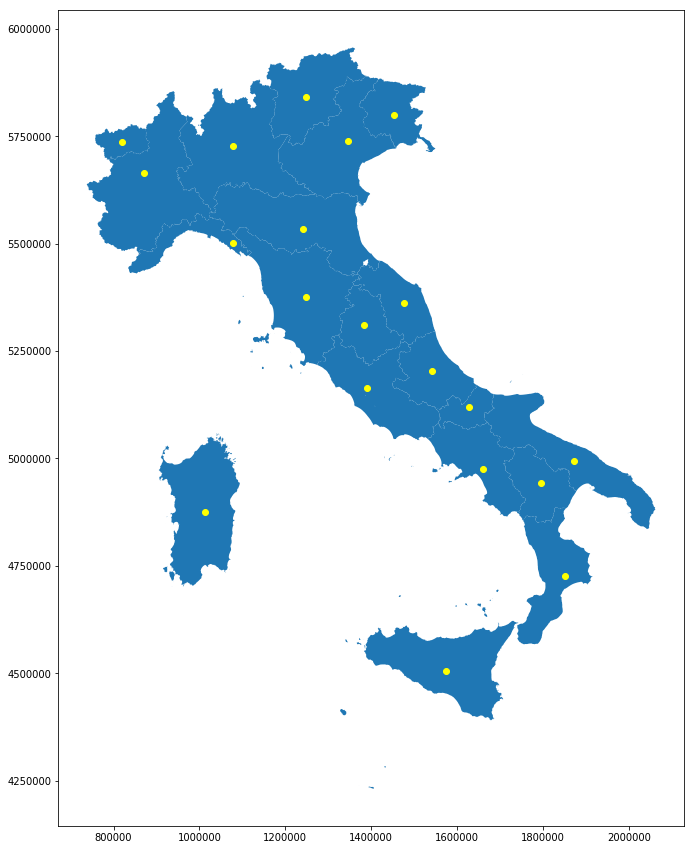

In [22]:
f, canvas = plt.subplots(1,figsize = (15, 15))
italian_regions.plot(ax=canvas,figsize=(15,15))
representative_points.plot(ax=canvas,color='yellow')
plt.show()

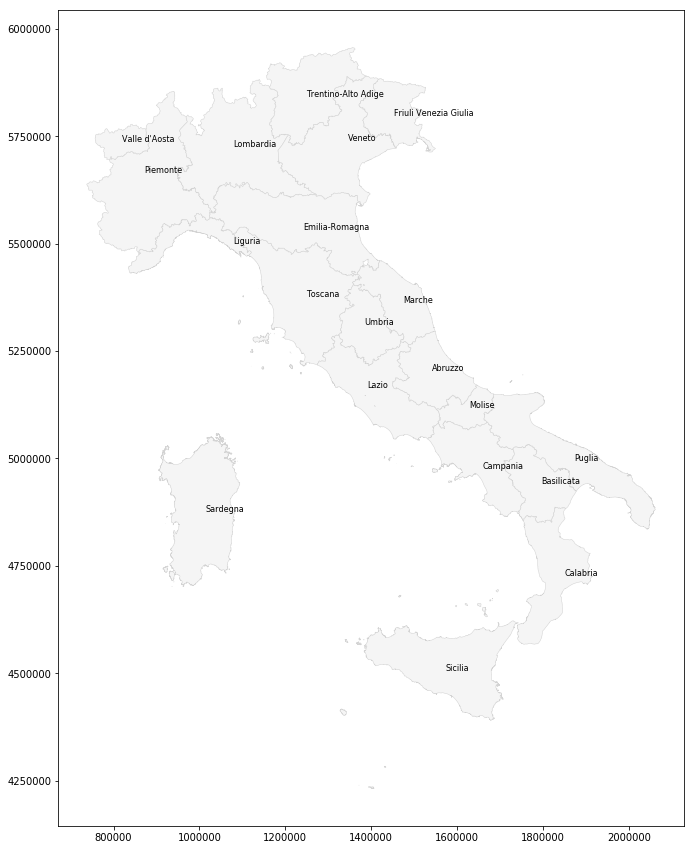

In [23]:
texts = []
canvas = italian_regions.plot(figsize = (15, 15), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)

for x, y, label in zip(representative_points.geometry.x, representative_points.geometry.y, representative_points["names"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

# Chroloplet maps


... setup the data

In [24]:
italianpeople_regions = pd.read_csv('data' + os.sep + 'popolazione_italiana_regioni_istat.csv')

In [25]:
italianpeople_regions.head(5)

,ITTER107,Territorio,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,ITC1,Piemonte,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,1,nubile/celibe,2018,2018,15535,NaN,NaN
1,ITC1,Piemonte,JAN,popolazione al 1º gennaio,1,maschi,Y0,0 anni,99,totale,2018,2018,15535,NaN,NaN
2,ITC1,Piemonte,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,1,nubile/celibe,2018,2018,15040,NaN,NaN
3,ITC1,Piemonte,JAN,popolazione al 1º gennaio,2,femmine,Y0,0 anni,99,totale,2018,2018,15040,NaN,NaN
4,ITC1,Piemonte,JAN,popolazione al 1º gennaio,9,totale,Y0,0 anni,1,nubile/celibe,2018,2018,30575,NaN,NaN


**comparison between the names of the regions present in the csv with the population and the shapefile**

... finding a common key (join)

In [26]:
italianpeople_regions.columns

Index(['ITTER107', 'Territorio', 'TIPO_DATO15',
       'Tipo di indicatore demografico', 'SEXISTAT1', 'Sesso', 'ETA1', 'Età',
       'STATCIV2', 'Stato civile', 'TIME', 'Seleziona periodo', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [27]:
italianpeople_regions.Territorio.unique()

array(['Piemonte', "Valle d'Aosta / Vallée d'Aoste", 'Liguria',
       'Lombardia', 'Trentino Alto Adige / Südtirol', 'Veneto',
       'Friuli-Venezia Giulia', 'Emilia-Romagna', 'Toscana', 'Umbria',
       'Marche', 'Lazio', 'Abruzzo', 'Molise', 'Campania', 'Puglia',
       'Basilicata', 'Calabria', 'Sicilia', 'Sardegna'], dtype=object)

In [28]:
italian_regions.columns

Index(['COD_RIP', 'COD_REG', 'DEN_REG', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [29]:
italian_regions.DEN_REG.unique()

array(['Piemonte', "Valle d'Aosta", 'Lombardia', 'Trentino-Alto Adige',
       'Veneto', 'Friuli Venezia Giulia', 'Liguria', 'Emilia-Romagna',
       'Toscana', 'Umbria', 'Marche', 'Lazio', 'Abruzzo', 'Molise',
       'Campania', 'Puglia', 'Basilicata', 'Calabria', 'Sicilia',
       'Sardegna'], dtype=object)

In [30]:
italianpeople_regions = italianpeople_regions.rename(columns={'Territorio':'DEN_REG'})

In [31]:
np.intersect1d(italianpeople_regions.DEN_REG.unique(),italian_regions.DEN_REG.unique())

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Lazio', 'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte',
       'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 'Umbria', 'Veneto'],
      dtype=object)

In [32]:
idx_taa = italianpeople_regions[italianpeople_regions.DEN_REG == 'Trentino Alto Adige / Südtirol'].index

In [33]:
for i in idx_taa:
    italianpeople_regions.at[i,'DEN_REG'] = 'Trentino-Alto Adige'

In [34]:
idx_fvg = italianpeople_regions[italianpeople_regions.DEN_REG == 'Friuli-Venezia Giulia'].index

In [35]:
for i in idx_fvg:
    italianpeople_regions.at[i,'DEN_REG'] = 'Friuli Venezia Giulia'

In [36]:
idx_vda = italianpeople_regions[italianpeople_regions.DEN_REG == "Valle d'Aosta / Vallée d'Aoste"].index

In [37]:
for i in idx_vda:
    italianpeople_regions.at[i,'DEN_REG'] = "Valle d'Aosta"

In [38]:
total_people_regions = italianpeople_regions[(italianpeople_regions.Sesso=='totale') & (italianpeople_regions['Stato civile'] =='totale') & (italianpeople_regions.Età == 'totale')]

In [39]:
total_people_regions.shape

(20, 15)

### .. now we can start with the choropleth maps :)

In [40]:
geo_people_italian_regions = italian_regions.merge(total_people_regions,on="DEN_REG").reset_index()

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 7.39 µs


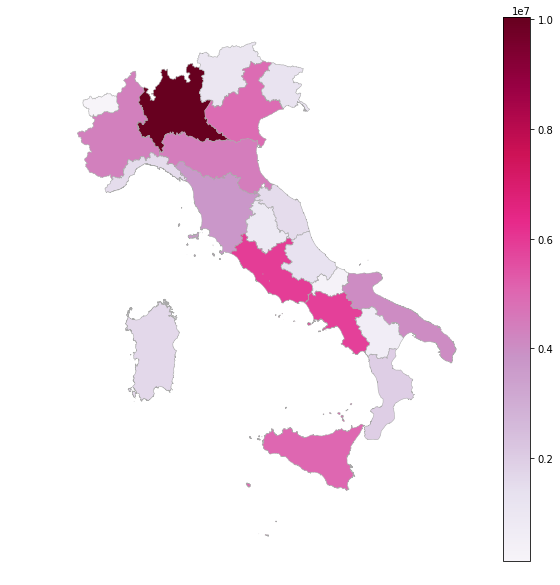

In [41]:
ax = geo_people_italian_regions.plot(column='Value',cmap="PuRd", legend=True,edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))
ax.set_axis_off()
%time


<div class="alert alert-info" style="font-size:120%">
<b>REFERENCE</b>

mapclassify - a module of PySal - offers different function to create choroloplet maps
<ul>
    <li>An overview of all methods provided by Mapclassify can be found here: <a href="https://mapclassify.readthedocs.io/en/latest/index.html">https://mapclassify.readthedocs.io/en/latest/index.html</a></li>
</ul>

In [42]:
quartilies=pi.viz.mapclassify.Equal_Interval(geo_people_italian_regions.Value,k=4)

In [43]:
quartilies

                   Equal Interval                   
 
   Lower                  Upper                Count
               x[i] <=  2603716.000               11
 2603716.000 < x[i] <=  5081230.000                6
 5081230.000 < x[i] <=  7558744.000                2
 7558744.000 < x[i] <= 10036258.000                1

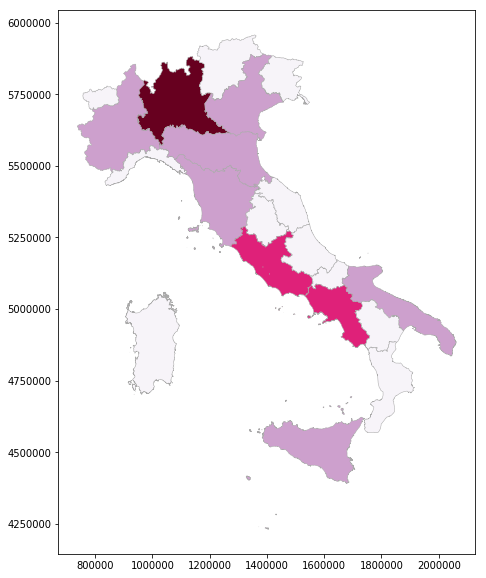

In [44]:
geo_people_italian_regions.assign(cl=quartilies.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [45]:
quantiles=pi.viz.mapclassify.Quantiles(geo_people_italian_regions.Value)

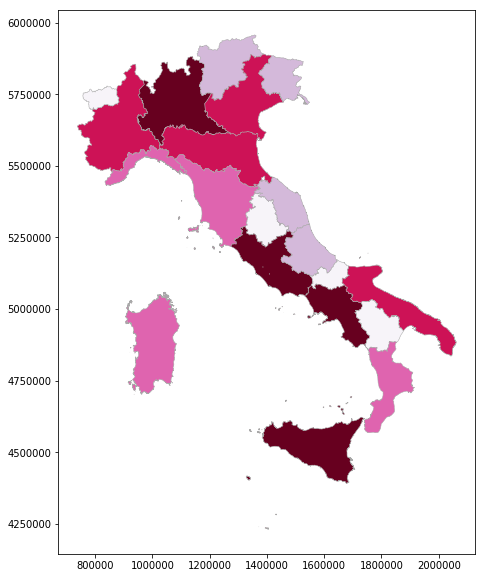

In [46]:
geo_people_italian_regions.assign(cl=quantiles.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [47]:
geo_people_italian_regions.columns

Index(['index', 'COD_RIP', 'COD_REG', 'DEN_REG', 'Shape_Leng', 'Shape_Area',
       'geometry', 'ITTER107', 'TIPO_DATO15', 'Tipo di indicatore demografico',
       'SEXISTAT1', 'Sesso', 'ETA1', 'Età', 'STATCIV2', 'Stato civile', 'TIME',
       'Seleziona periodo', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [48]:
percentile=pi.viz.mapclassify.Percentiles(geo_people_italian_regions.Value)

In [49]:
percentile.bins

array([  160837.29      ,   541255.5       ,  1802431.5       ,
        5833843.3       ,  9249740.64999999, 10036258.        ])

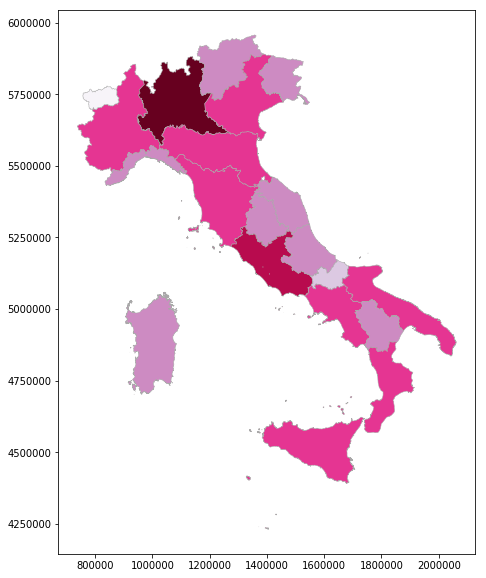

In [50]:
geo_people_italian_regions.assign(cl=percentile.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

<div class="alert alert-info" style="font-size:120%">
<b>Natural Breaks</b>
<p>
The Jenks optimization method, also called the Jenks natural breaks classification method, is a data clustering method designed to determine the best arrangement of values into different classes. 
</p><br/>
(source: <a href="https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization">https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization</a>)

In [51]:
natural_breaks=pi.viz.mapclassify.Natural_Breaks(geo_people_italian_regions.Value)

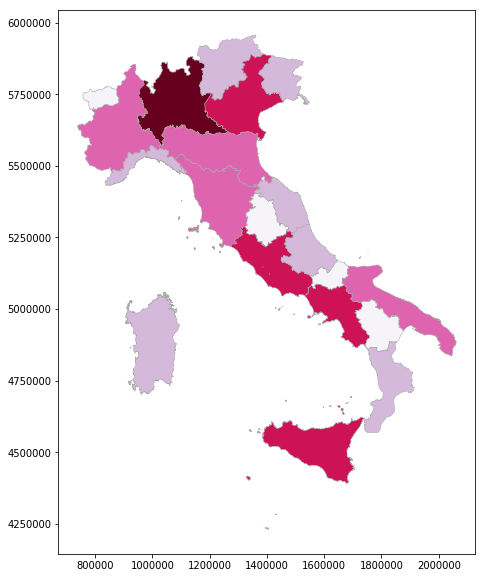

In [52]:
geo_people_italian_regions.assign(cl=natural_breaks.yb).plot(column='cl',cmap="PuRd", edgecolor = "darkgrey", linewidth = 0.5, figsize=(10,10))

In [53]:
natural_breaks.bins

array([  884640.,  1956687.,  4452629.,  5896693., 10036258.])

In [54]:
fisher_jenks=pi.viz.mapclassify.Fisher_Jenks(geo_people_italian_regions.Value)

In [55]:
fisher_jenks.bins

array([  884640,  1956687,  4452629,  5896693, 10036258])

# Heath Maps

In [74]:
from scipy import ndimage

In [70]:
libraries = gpd.read_file('data' + os.sep + 'italian_libraries.shp')

In [75]:
libraries_turin = libraries[libraries.comune=='Torino']

In [76]:
libraries_turin.crs

{'init': 'epsg:4326'}

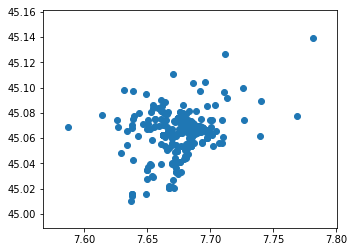

In [78]:
libraries_turin.plot()

In [125]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

/home/napo/dev/geospatial_bigdive/env/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


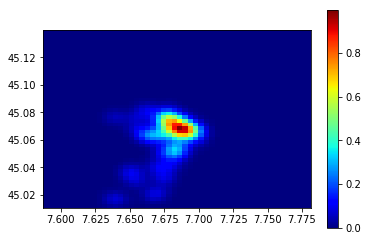

In [127]:
heatmap(libraries_turin, bins=50, smoothing=1.5)

# Folium

In [56]:
import folium

In [117]:
center_point_turin = libraries_turin.unary_union.envelope.centroid

In [121]:
map_turin = folium.Map([center_point_turin.y,center_point_turin.x], zoom_start=11, tiles="OpenStreetMap")
folium.GeoJson(libraries_turin.to_json()).add_to(map_turin)
map_turin

##  heatmap with folium

In [116]:
from folium.plugins import HeatMap

In [99]:
heat_data = [[row['geometry'].y,row['geometry'].x] for index, row in libraries_turin.iterrows()]

In [122]:
map_torino = folium.Map(location=[center_point_turin.y, center_point_turin.x],
                    zoom_start = 11) 

In [123]:
HeatMap(heat_data).add_to(map_torino)

In [124]:
map_torino